# Assignment 2 : Bike Sharing Assignment

### Importing Libraries 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
def loadData(filePath):
    df = pd.read_csv(filePath + 'day.csv')
    return df

def preProcessing(data):
    data.rename(columns = {'yr':'year','mnth':'month','hum':'humidity'}, inplace = True)
    data.drop_duplicates(inplace=True)
    data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
    data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
    data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
    data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
    data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
    return data

def plotBarplot(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data = data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data = data, hue ='year',palette ='Set1')
    plt.legend(labels = ['2018', '2019'])
    plt.show()
    
def preparingDataForModel(data):
    months_df=pd.get_dummies(data.month,drop_first=True)
    weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
    weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
    seasons_df=pd.get_dummies(data.season,drop_first=True)
    
    newData = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
    newData.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
    return newData

def splitTrainTestDF(data):
    X = data.iloc[:, :-1]  # All rows, all columns except the last one
    Y = data.iloc[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)
    return X_train, X_test, Y_train, Y_test

def loadModel(X_train, Y_train):
    linearRModel = LinearRegression()
    linearRModel.fit(X_train, Y_train)
    return linearRModel

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


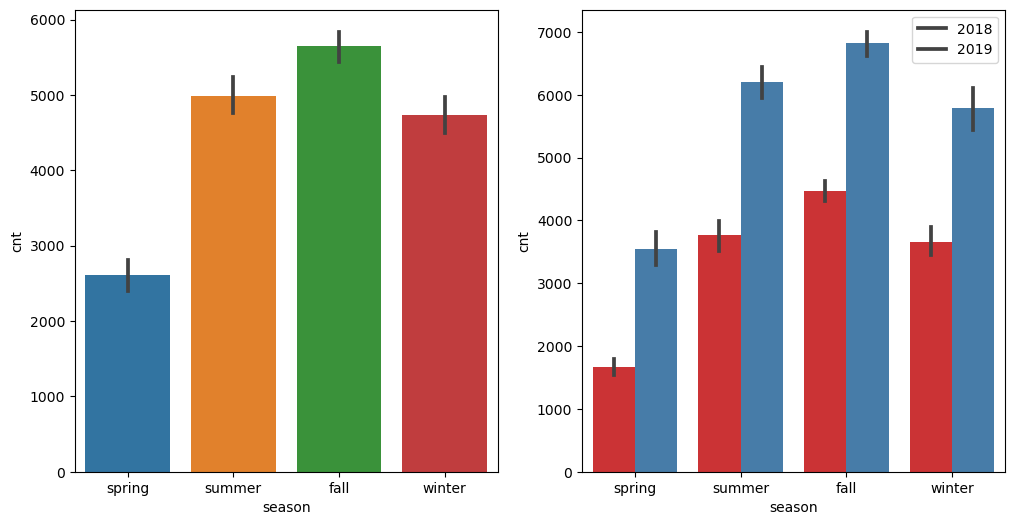

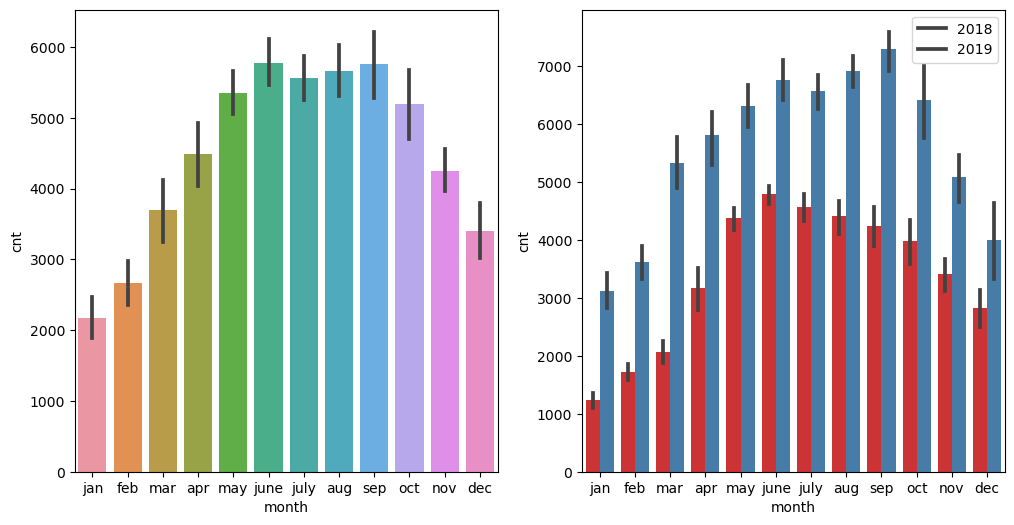

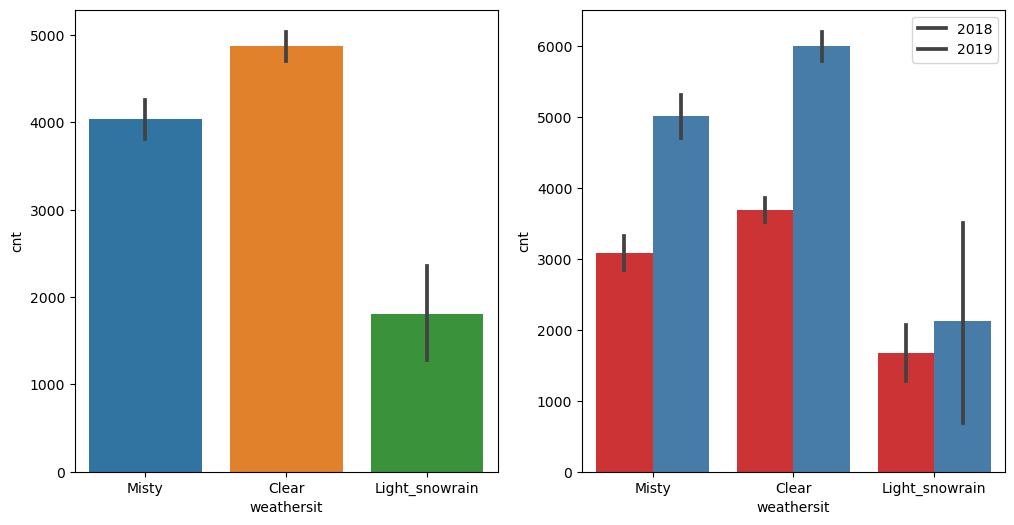

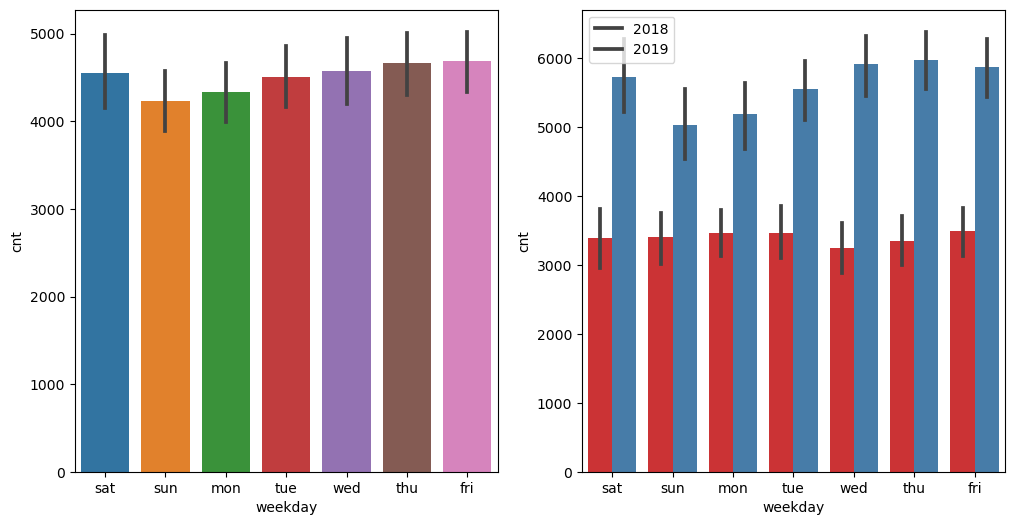

In [3]:
if __name__ == "__main__":
    filePath = r'C:/Users/lenovo/Desktop/IIIT_Document/Assignments/2-Assignment/'
    
    data = loadData(filePath)
    preProcessedData = preProcessing(data)
    data.info()
    plotBarplot('season')
    plotBarplot('month')
    plotBarplot('weathersit')
    plotBarplot('weekday')

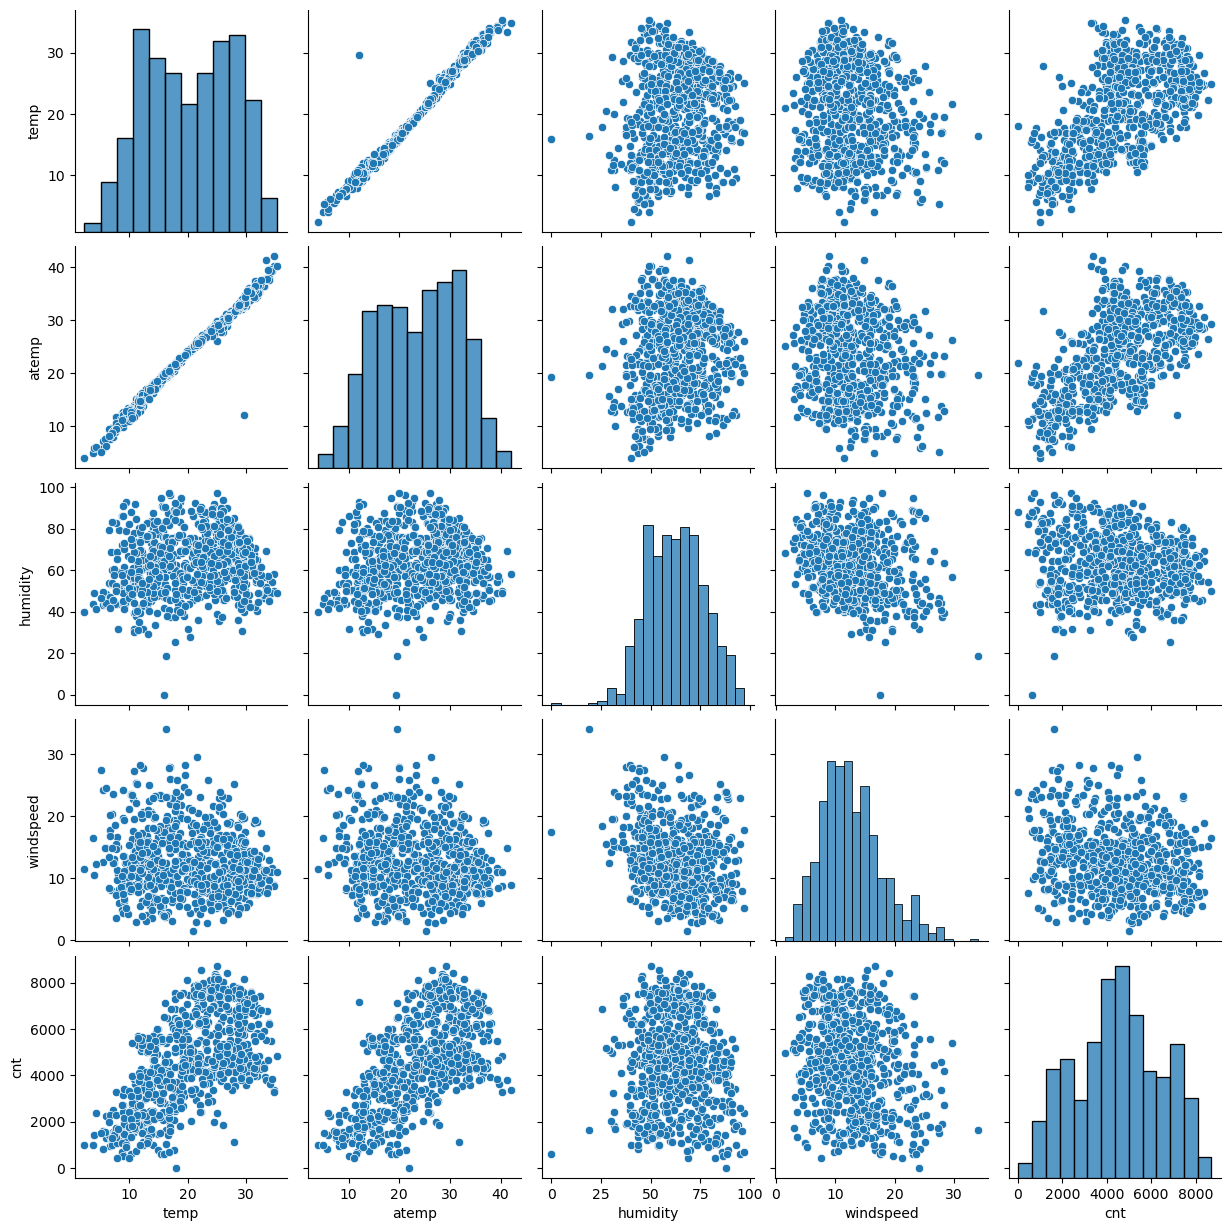

In [4]:
    sns.pairplot(data = data,vars=['temp','atemp','humidity','windspeed','cnt'])
    plt.show()

In [5]:
    preparedData = preparingDataForModel(data)
    preparedData.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
    X_train, X_test, Y_train, Y_test = splitTrainTestDF(preparedData)
    lRmodel = loadModel(X_train, Y_train)

In [7]:
    vif = calculateVIF(X_train)
    vif

,Features,VIF
3,temp,214.91
4,atemp,198.26
2,workingday,116.29
21,sun,25.15
20,sat,24.47
27,spring,7.79
28,summer,6.94
1,holiday,6.53
11,jan,6.32
7,cnt,6.27


In [8]:
    X_trainNew = X_train.drop(['temp', 'atemp', 'workingday', 'sun', 'sat', 'humidity'], axis=1)
    X_testNew = X_test.drop(['temp', 'atemp', 'workingday', 'sun', 'sat', 'humidity'], axis=1)


    # Run the function to calculate VIF for the new model
    vif = calculateVIF(X_trainNew)
    vif

,Features,VIF
3,cnt,22.24
21,spring,8.14
2,windspeed,6.76
22,summer,5.14
7,jan,4.43
0,year,4.37
6,feb,3.88
14,sep,3.35
13,oct,3.33
8,july,3.15


In [9]:
    lRmodel = loadModel(X_trainNew, Y_train)
    y_trainPredict = lRmodel.predict(X_trainNew)
    y_testPredict = lRmodel.predict(X_testNew)

In [13]:
    r2 = r2_score(Y_test, y_testPredict)
    print("r2 score =", round(r2,4)*100, "%")

r2 score = 82.72 %


In [16]:
    # Calculating Adjusted-R^2 value for the test dataset

    adjusted_r2 = round(1-(1-r2)*(X_testNew.shape[0]-1)/(X_testNew.shape[0]-X_testNew.shape[1]-1),4)
    print("adjusted_r2 =", adjusted_r2*100, "%")

adjusted_r2 = 79.46 %


### Analysis results :
    - R^2          : 82.72%
    - Adjusted R^2 : 79.46%
    
Following observations made based on EDA:
1. Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
2. Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
3. Number of booking for each month seems to have increased from 2018 to 2019.
4. Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.
5. Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.